#Importazione librerie e df

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score #E' la nuova metrica
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv

--2022-03-22 14:39:52--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.86
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39965 (39K) [text/csv]
Saving to: ‘audit.csv.3’

audit.csv.3         100%[===================>]  39.03K   159KB/s    in 0.2s    

2022-03-22 14:39:53 (159 KB/s) - ‘audit.csv.3’ saved [39965/39965]



In [ ]:
df = pd.read_csv('audit.csv')

In [ ]:
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0




---



---



#1. EDA

Siamo davanti ad un problema di **classificazione bianaria**, il rischio è o risk 1 oppure risk 0.

In [ ]:
pd.unique(df['Risk'])

array([1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [ ]:
# getting the statistical measures of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,20.184536,24.319017,1.85,2.3700,3.890,55.5700,59.85
PARA_A,776.0,2.450194,5.678870,0.00,0.2100,0.875,2.4800,85.00
SCORE_A,776.0,3.512887,1.740549,2.00,2.0000,2.000,6.0000,6.00
PARA_B,776.0,10.799988,50.083624,0.00,0.0000,0.405,4.1600,1264.63
SCORE_B,776.0,3.131443,1.698042,2.00,2.0000,2.000,4.0000,6.00
TOTAL,776.0,13.218481,51.312829,0.00,0.5375,1.370,7.7075,1268.91
numbers,776.0,5.067655,0.264449,5.00,5.0000,5.000,5.0000,9.00
Marks,776.0,2.237113,0.803517,2.00,2.0000,2.000,2.0000,6.00
Money_Value,775.0,14.137631,66.606519,0.00,0.0000,0.090,5.5950,935.03
MONEY_Marks,776.0,2.909794,1.597452,2.00,2.0000,2.000,4.0000,6.00


La tipologia di dato OBJECT ci da' fastidio, perché c'è qualche valore numerico inserito come stringa! 

In [ ]:
pd.unique(df['LOCATION_ID']) #valorici univoci di location ID

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
#df['LOCATION_ID']  = df['LOCATION_ID'].astype(float) #provo a trasformare le stringhe in valori float ma mi da' errore perché la stringa non si può modificare in float

###Numero di missing values nelle colonne

Faccio la somma della somma dei valori nulli per vedere se non ne ho:

In [ ]:
df.isnull().sum().sum() == 0 #no, significa che ho valori nulli

False

In [ ]:
df.isnull().sum() #Quanti valori nulli

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

##Bilanciamento del dataset

Controllo che per ogni classe io abbia una percentuale più o meno simile

In [ ]:
df['Risk'].value_counts()

1    486
0    290
Name: Risk, dtype: int64

*  0--> NO RISK
*  1--> RISK

Non è molto equilibrato, perché è circa 75-25 rischio/no rischio. 


##Label encoder

Se avessi avuto scritto invece di 0 ed 1 la stringa, devo modificarlo in numero con il label encoder oppure con il metodo map di pandas

##SEABORN

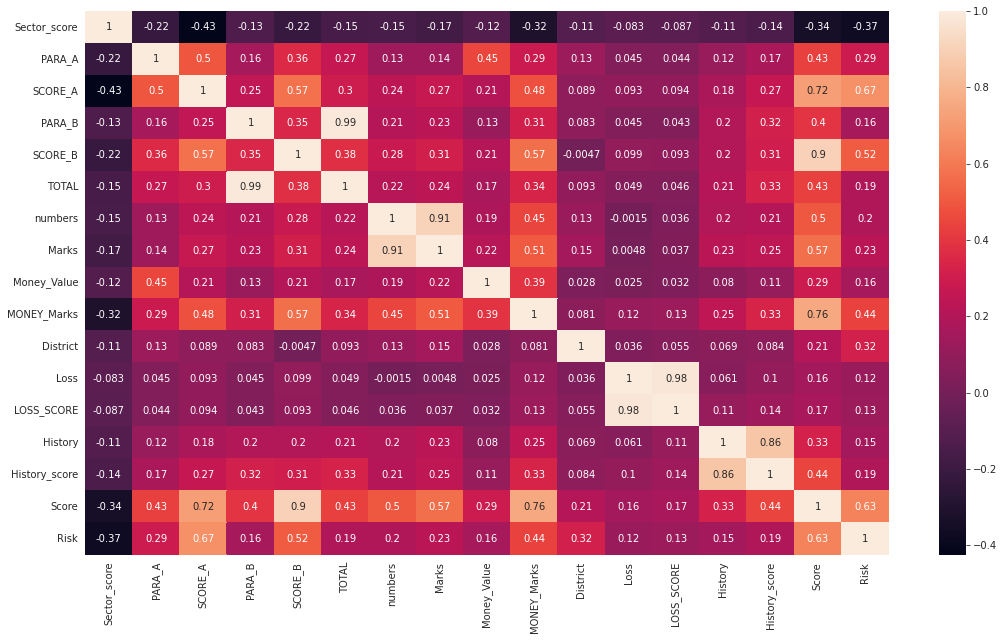

In [ ]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#sns.pairplot(df, hue='Risk')

Il fatto che siano sovrapposti è un problema per poi dividerle, potrebbe essere uno come potrebbe essere l'altro! 
Hanno tutti lo stesso valore perché nella diagonale principale si sovrappongono. 
\ 
Come se quando c'è Risk=1 ha la stessa specifica ed è ricursivo. 
Vengono delle rette perché la frequenza è sempre la stessa e tutti hanno lo stesso valore. 

##Drop valore nullo

In [ ]:
df = df.dropna()

##Separo data e labels

In [ ]:
# separating the data and labels
X_ = df.drop(['Risk','LOCATION_ID'], axis=1)
y = df['Risk']

##Correlazioni con pandas

In [ ]:
corr = df.corr()
corr['Risk'].abs().sort_values(ascending=False)

Risk             1.000000
SCORE_A          0.671464
Score            0.631857
SCORE_B          0.514636
MONEY_Marks      0.439842
Sector_score     0.373070
District         0.317486
PARA_A           0.292116
Marks            0.227864
numbers          0.197545
TOTAL            0.190584
History_score    0.190267
PARA_B           0.162628
Money_Value      0.160717
History          0.151777
LOSS_SCORE       0.127337
Loss             0.124190
Name: Risk, dtype: float64

#2. Standardizzazione (opzionale)

In [ ]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-0.66907089  0.30412945  1.4285004  ... -0.19682237 -0.24673663
  -0.35348365]
 [-0.66907089 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [-0.66907089 -0.34218966 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 ...
 [ 1.45892742 -0.38973902 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.39678337 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]]


In [ ]:
X = standardized_data
y = df['Risk']

In [ ]:
print(X)
print(y)

[[-0.66907089  0.30412945  1.4285004  ... -0.19682237 -0.24673663
  -0.35348365]
 [-0.66907089 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [-0.66907089 -0.34218966 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 ...
 [ 1.45892742 -0.38973902 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.39678337 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]]
0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 775, dtype: int64


#Scelta delle Features

In [ ]:
X_.columns


Index(['Sector_score', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL',
       'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss',
       'LOSS_SCORE', 'History', 'History_score', 'Score'],
      dtype='object')

Faccio il subset del df:

In [266]:
#df = df[['SCORE_A','Score','SCORE_B','Sector_score','MONEY_Marks','Risk']]
df = df[['SCORE_B','Sector_score','MONEY_Marks','Risk']]
X_ = df.drop(['Risk'], axis=1)
y = df['Risk']

#3. Train Test Split

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [268]:
print(X.shape, X_train.shape, X_test.shape)


(775, 16) (620, 16) (155, 16)


###RandomForest

In [269]:
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [270]:
print(X.shape, X_trainRF.shape, X_testRF.shape)

(775, 16) (620, 3) (155, 3)


###KNN

In [271]:
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

###Decision Tree

In [272]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

#4. Dichiaro il classificatore/modello

###LogisticRegression

In [273]:
classifierL = LogisticRegression()

###RandomForest

In [274]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier()


###KNN

In [275]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier()


##Decision Tree

In [276]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier()

#5. FIT

##LogisticRegression

In [277]:
classifierL.fit(X_train, y_train)

LogisticRegression()

##RandomForest

In [278]:
classifierRF.fit(X_trainRF, y_trainRF)

RandomForestClassifier()

##KNN

In [279]:
classifierKNN.fit(X_trainKNN, y_trainKNN)

KNeighborsClassifier()

##Decision Tree

In [280]:
classifierDT.fit(X_trainDT, y_trainDT)

DecisionTreeClassifier()

#6. EVALUATION (Verifica dell'accuracy del modello)

##LogisticRegression

In [281]:
# accuracy score on the test data
y_pred = classifierL.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [282]:
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  1.0


##RandomForest

In [283]:
# accuracy score on the test data
y_predRF = classifierRF.predict(X_testRF)
test_data_accuracyRF = accuracy_score(y_predRF, y_testRF)

In [284]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


##KNN

In [285]:
# accuracy score on the test data
y_predKNN = classifierKNN.predict(X_testKNN)
test_data_accuracyKNN = accuracy_score(y_predKNN, y_testKNN)

In [286]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


##Decision Tree

In [287]:
# accuracy score on the test data
y_predDT = classifierDT.predict(X_testDT)
test_data_accuracyDT = accuracy_score(y_predDT, y_testDT)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


#7. CONFUSION MATRIX

##Step 1: Definire le labels

In [288]:
labels = ['No Risk', 'Risk']

##Step 2: Importare ConfusionMatrixDisplay

###LogisticRegression

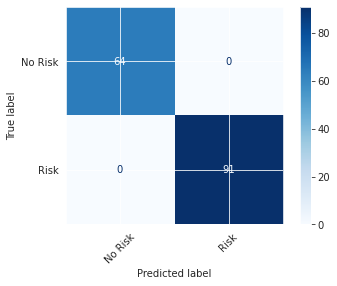

In [289]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierL, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

###RandomForest

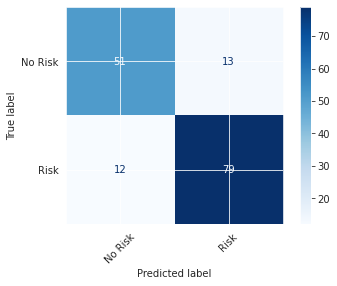

In [290]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierRF, 
                                      X_testRF, 
                                      y_testRF,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

Sensitivity e specificity è uguale ad 1. Non c'è stata misclassification

###KNN

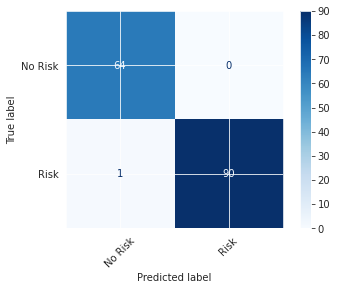

In [291]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierKNN, 
                                      X_testKNN, 
                                      y_testKNN,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

###Decision Tree

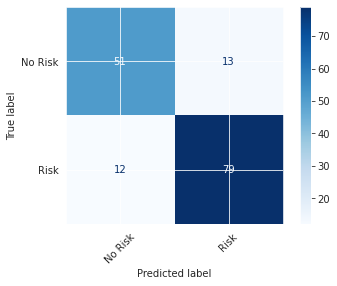

In [292]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierDT, 
                                      X_testDT, 
                                      y_testDT,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

#8. CLASSIFICATION REPORT per F1 Score

###LogisticRegression

In [ ]:
from sklearn.metrics import classification_report
#labels = ['No Risk', 'Risk']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00        64
        Risk       1.00      1.00      1.00        91

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



F1 è la media armonica della precision e recall. Quando viene calcolata, è calcolata per una classe e poi per l'altra, quando le va a calcolare sono pesate per classi. 

Support: y_test è 155 righe, di cui 64 classe 1, e 91 classe 0 (o contrario)

###RandomForest

In [ ]:
from sklearn.metrics import classification_report
#labels = ['No Risk', 'Risk']
print(classification_report(y_testRF, y_predRF, target_names=labels))

              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00        64
        Risk       1.00      1.00      1.00        91

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



##KNN

In [ ]:
from sklearn.metrics import classification_report
#labels = ['No Risk', 'Risk']
print(classification_report(y_testKNN, y_predKNN, target_names=labels))

              precision    recall  f1-score   support

     No Risk       0.98      1.00      0.99        64
        Risk       1.00      0.99      0.99        91

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



##Decision Tree

In [ ]:
from sklearn.metrics import classification_report
#labels = ['No Risk', 'Risk']
print(classification_report(y_testDT, y_predDT, target_names=labels))

              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00        64
        Risk       1.00      1.00      1.00        91

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



#9. In caso di problema BINARIO


##ROC Curve


In [ ]:
!pip install plot-metric --quiet

###LogisticRegression

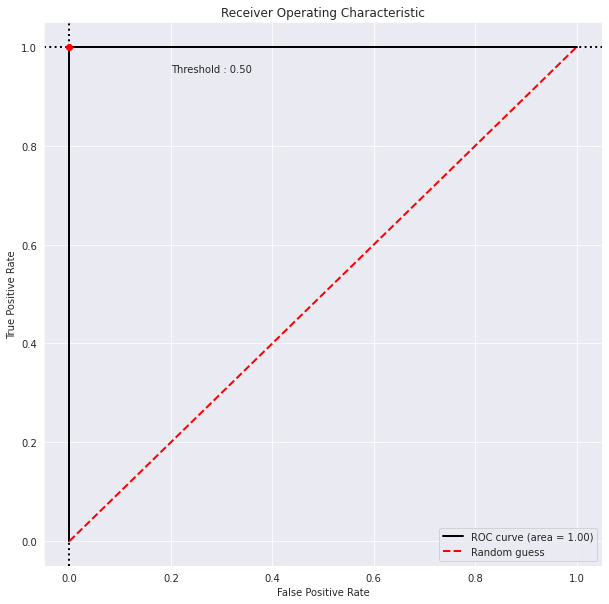

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifierL.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

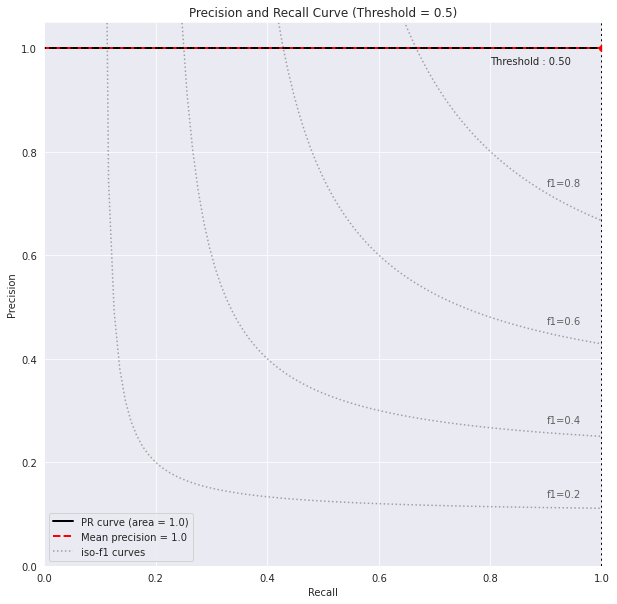

In [ ]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

##grafico (ROC Curve (area=1.00), quell'Area è la AUC)

La ROC Curve è perfetta.

In [ ]:
##grafico con relazione tra precision e recall per vedere come variano i true positive e false negative

###RandomForest

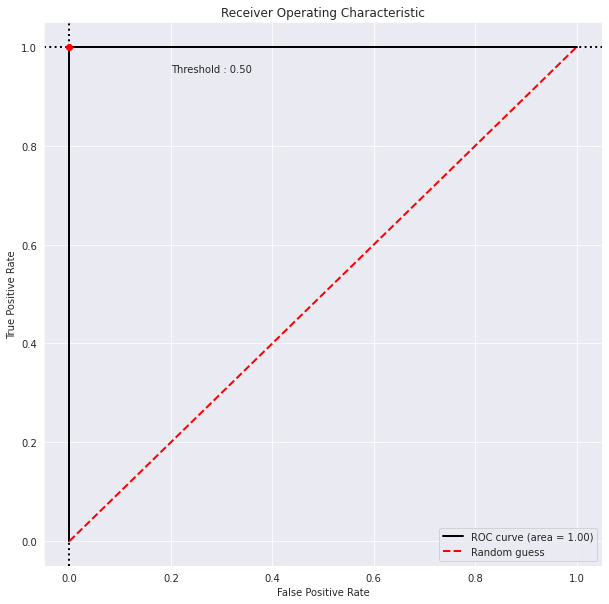

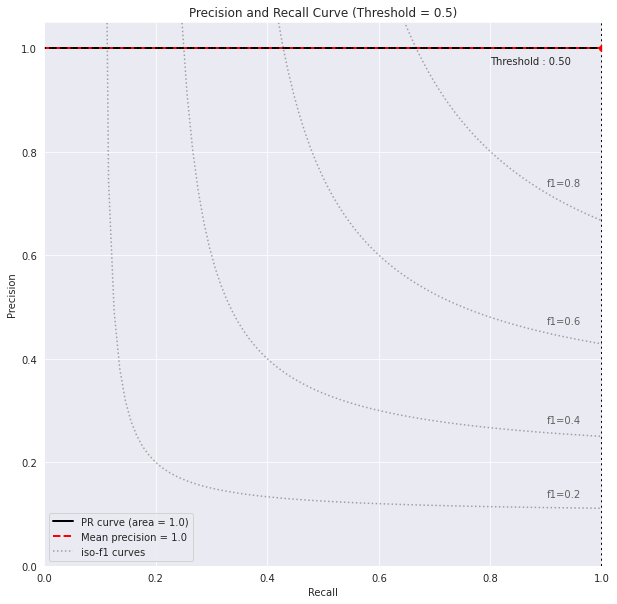

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_probaRF = classifierRF.predict_proba(X_testRF)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_testRF, y_pred_probaRF, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

##grafico (ROC Curve (area=1.00), quell'Area è la AUC)

###KNN

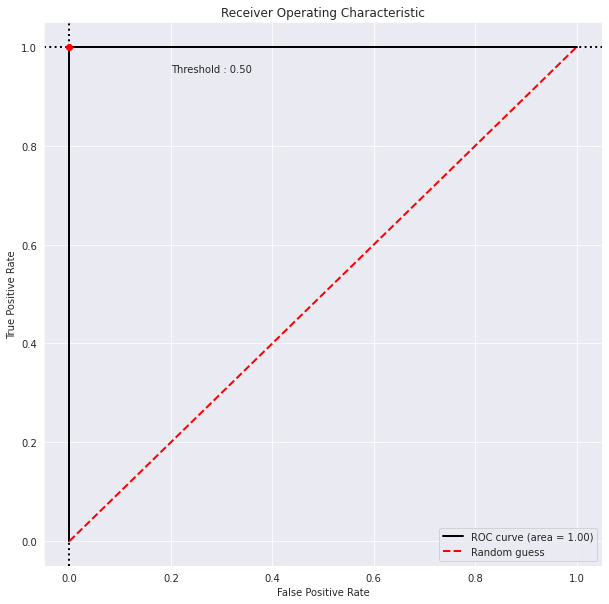

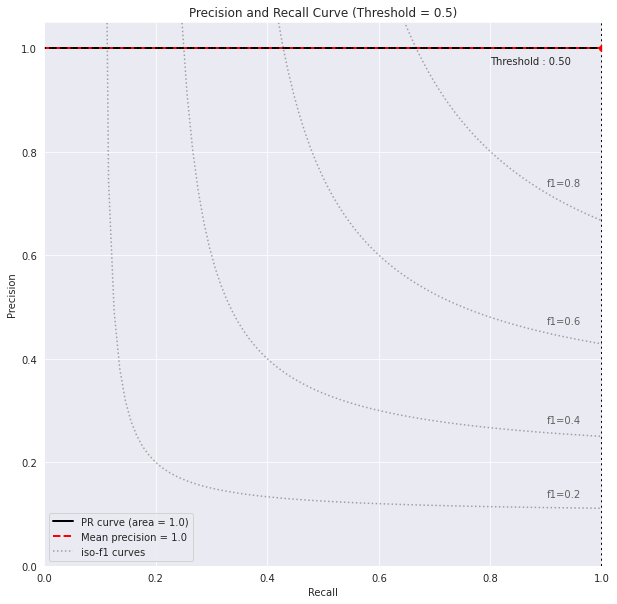

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_probaKNN = classifierKNN.predict_proba(X_testKNN)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_testKNN, y_pred_probaKNN, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

##grafico (ROC Curve (area=1.00), quell'Area è la AUC)

###Decision Tree

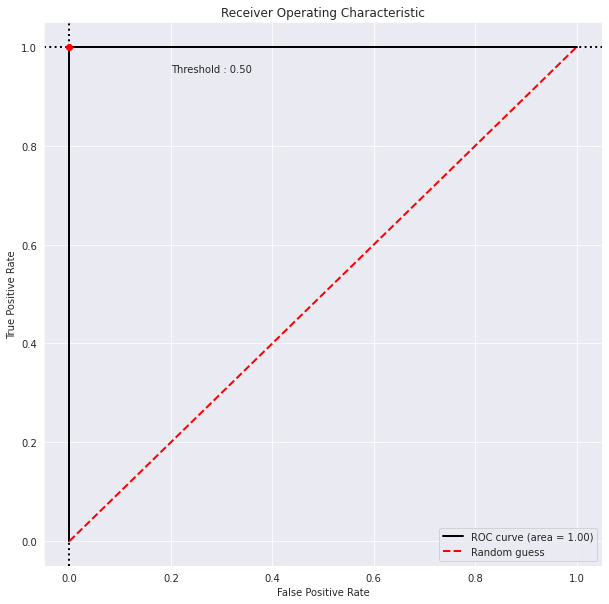

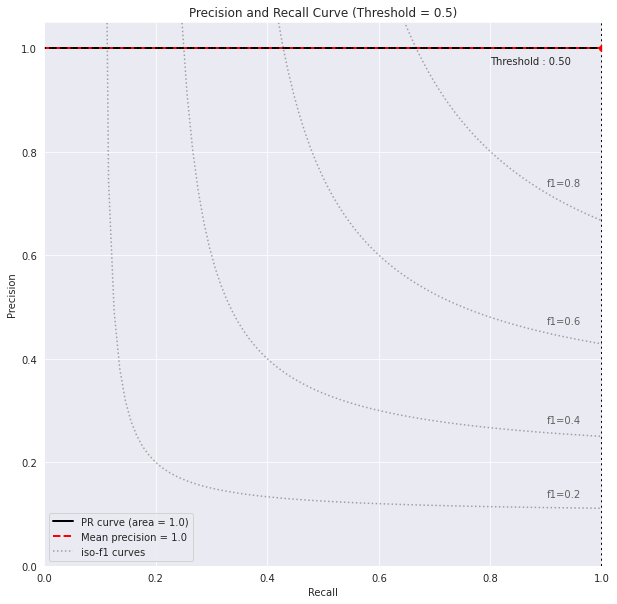

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_probaDT = classifierDT.predict_proba(X_testDT)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_testDT, y_pred_probaDT, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

##grafico (ROC Curve (area=1.00), quell'Area è la AUC)

(Se ho più modelli scelgo quello con l'AUC più grande) 


#10. PIPELINE

#Array compatibile con prediction

#File .pckl

Ogni volta che voglio riutilizzare il modello devo sempre fare la standardization se non è una pipeline

#11. Utilizzo il modello

In [ ]:
input_data = [3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

La lista di input deve avere lo stesso numero delle features!!


##Devo sempre fare il reshape

Per far si che l'array possa essere trasformato devo fare il reshape perché standar scaler vuole così 

if prediction[0]==0  print (no risk) perché ho salvato risk/no risk con i numeri invece che con le stringhe

In [ ]:

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:


# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('No risk')
else:
  print('Risk')